In [1]:
# %load_ext nb_black
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics as m
import xgboost as xgb
import seaborn as sns
warnings.filterwarnings("ignore")
random_seed = 8
import pickle

In [2]:
# collected form each main diabetic indicator features regressors
cols = np.unique(
    [
        'L100700', 'SEX', 'S000300', 'L103000', 'L103100', 'L103300',  
       'S000501', 'S000100', 'L101300', 'L190300', 'L100500', 'L101700',
      
      'S000300', 'SEX', 'L103300', 'S000501',  
                       'L103100', 'L101300', 'S000502', 'L190300', 'L190400', 'L100700', 'L103000', 'L100800',
      
      'L101700', 'SEX', 'L101300', 'FIELD_38', 'S000300', 'L101200', 
                       'L100700', 'L190400', 'L103000', 'L103300', 'L190300', 'L100800',
      
      'L100800', 'L104600', 'SEX', 'AGE', 'L101300', 'S000300', 
                       'L103000', 'L103300', 'S000501', 'S000502', 'L101700', 'FIELD_38',
        
        'L103300', 'L103100', 'L103000', 'L103200', 'S000300', 'L102900', 'SEX', 
                       'L100700', 'L190300', 'L190400', 'L190500', 'L100500',
        
        'L103100', 'L103300', 'SEX', 'S000300', 'L103000', 'L190300', 
        'L100700', 'L190400', 'L190500', 'L100500', 'S000100', 'L101300',     
        
        
        'L190500', 'SEX',  'L190400', 'L190300', 'L104500', 'L190800',
       'S000300', 'L100700', 'L103100', 'S000100', 'S000502', 'S000501',
        
        'L190300', 'SEX', 'L190500', 'L190400', 'L103100', 'S000300',
       'L100700', 'L103300', 'S000100', 'L103000', 'S000501', 'S000502',
        
        'L101300', 'SEX', 'S000300', 'L101200', 'L103300', 'L101700',
       'L100700', 'L103100', 'L190400', 'L190300', 'S000100', 'L190500',
      
        'FIELD_16','FIELD_23','FIELD_15','FIELD_22','FIELD_17','FIELD_24','FIELD_33','FIELD_40','FIELD_1','FIELD_2',
        
        'L102900', 'L103000', 'L103200' 
    ]
)

print(cols)
print(cols.shape)

['AGE' 'FIELD_1' 'FIELD_15' 'FIELD_16' 'FIELD_17' 'FIELD_2' 'FIELD_22'
 'FIELD_23' 'FIELD_24' 'FIELD_33' 'FIELD_38' 'FIELD_40' 'L100500'
 'L100700' 'L100800' 'L101200' 'L101300' 'L101700' 'L102900' 'L103000'
 'L103100' 'L103200' 'L103300' 'L104500' 'L104600' 'L190300' 'L190400'
 'L190500' 'L190800' 'S000100' 'S000300' 'S000501' 'S000502' 'SEX']
(34,)


In [3]:
xcols=[]
ycols=[]
allxycols=[]

for i in cols:
    xcols.append (i+'_x')
    ycols.append (i+'_y')
    
    allxycols.append (i+'_x')
    allxycols.append (i+'_y')

Read Dataset
====

In [5]:
x_original=pd.read_csv('../../Dataset/XLable_onlyDiabeticRemoved.txt')
y_original=pd.read_csv('../../Dataset/TargetLable_onlyDiabeticRemoved.txt')

data = pd.merge(
    x_original, y_original, how="inner", left_on="Unnamed: 0", right_on="Unnamed: 0"
)

Prepare dataset
===

In [6]:
# filter the data set
data = data[data.FIELD_16_x != 1]  # exclude people who are diagnosed for (diabetes)
data = data[data.FIELD_23_x != 1]  # exclude people who are on medication for diabetes

data = data[
    data.FIELD_15_x != 1
]  # exclude people who are diagnosed for (high blood pressure)
data = data[
    data.FIELD_22_x != 1
]  # exclude people who are on medication for high blood pressure

data = data[data.FIELD_17_x != 1]  # exclude people who are diagnosed for hyperlipidemia
data = data[
    data.FIELD_24_x != 1
]  # exclude people who are on medication for hyperlipidemia


data = data[allxycols].dropna()
print(data.shape)

(21803, 68)


In [7]:
x = data[xcols]
y = data[ycols]

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.3)

Train Regression Models
==========

L100700_x # Uric Acid
====

In [15]:
regr = RandomForestRegressor(
    max_depth=10, random_state=random_seed, verbose=0, n_estimators=500, max_features=8
)
regr.fit(
    xtrain[
        [
            'L100700_x', 'SEX_x', 'S000300_x', 'L103000_x', 'L103100_x', 'L103300_x',
       'S000501_x', 'S000100_x', 'L101300_x', 'L190300_x', 'L100500_x', 'L101700_x'
        ]
    ],
    ytrain[["L100700_y"]],
)

ypred = regr.predict(
    xtest[
        [
            'L100700_x', 'SEX_x', 'S000300_x', 'L103000_x', 'L103100_x', 'L103300_x',
       'S000501_x', 'S000100_x', 'L101300_x', 'L190300_x', 'L100500_x', 'L101700_x'
        ]
    ]
)

print("r2_score", m.r2_score(ytest[["L100700_y"]], ypred))

r2_score 0.7464862166882387


In [16]:
pred_L100700 = ypred
pred_L100700.shape


with open('models/hyperlipidemiaModel_nextyear_L100700_RF_regressor', 'wb') as f:
    pickle.dump(regr, f)    

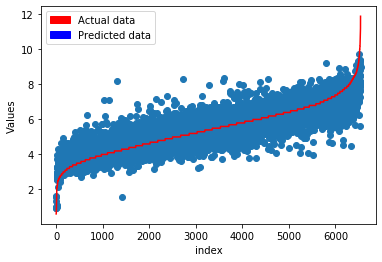

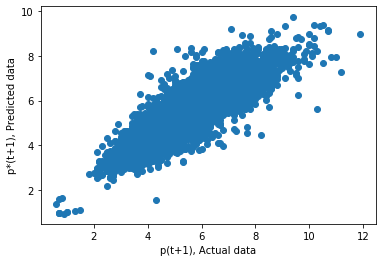

In [17]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L100700_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

S000300 #BMI
===

In [18]:
regr = RandomForestRegressor(
    max_depth=10, random_state=random_seed, verbose=0, n_estimators=500, max_features=4
)
regr.fit(
    xtrain[
        [            
      'S000300_x', 'SEX_x', 'L103300_x', 'S000501_x','L103100_x', 'L101300_x', 'S000502_x', 
            'L190300_x', 'L190400_x', 'L100700_x', 'L103000_x', 'L100800_x',
        ]
    ],
    ytrain[["S000300_y"]],
)

ypred = regr.predict(
    xtest[
        [
            'S000300_x', 'SEX_x', 'L103300_x', 'S000501_x','L103100_x', 'L101300_x', 'S000502_x', 
            'L190300_x', 'L190400_x', 'L100700_x', 'L103000_x', 'L100800_x',
        ]
    ]
)

print("r2_score", m.r2_score(ytest[["S000300_y"]], ypred))

r2_score 0.8972583057086305


In [19]:
pred_S000300 = ypred
with open('models/hyperlipidemiaModel_nextyear_S000300_regressor', 'wb') as f:
    pickle.dump(regr, f)  

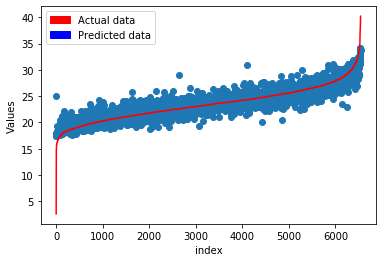

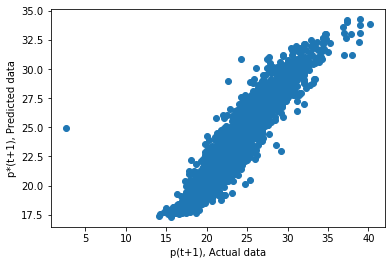

In [20]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["S000300_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

L101700 # r-GTP gamma
===

In [21]:
regr = RandomForestRegressor(
    max_depth=8, random_state=random_seed, verbose=0, n_estimators=1000
)
regr.fit(
    xtrain[
        ['L101700_x', 'SEX_x', 'L101300_x', 'FIELD_38_x', 'S000300_x', 'L101200_x', 
        'L100700_x', 'L190400_x', 'L103000_x', 'L103300_x', 'L190300_x', 'L100800_x',
        ]
    ],
    ytrain[["L101700_y"]],
)

ypred = regr.predict(
    xtest[
        ['L101700_x', 'SEX_x', 'L101300_x', 'FIELD_38_x', 'S000300_x', 'L101200_x', 
        'L100700_x', 'L190400_x', 'L103000_x', 'L103300_x', 'L190300_x', 'L100800_x',
        ]
    ]
)

print("r2_score", m.r2_score(ytest[["L101700_y"]], ypred))

r2_score 0.7243531425790715


In [22]:
pred_L101700 = ypred
with open('models/hyperlipidemiaModel_nextyear_L101700_RF_regressor', 'wb') as f:
    pickle.dump(regr, f)  

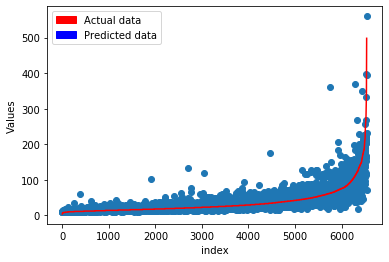

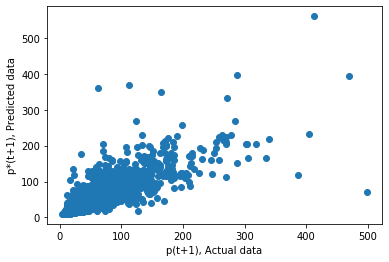

In [23]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L101700_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

L100800 # fasting glucose level
====

In [24]:
regr = RandomForestRegressor(
    max_depth=10, random_state=random_seed, verbose=0, n_estimators=1000, max_features=6
)
regr.fit(
    xtrain[
        [
           'L100800_x', 'L104600_x', 'SEX_x', 'AGE_x', 'L101300_x', 'S000300_x', 
                       'L103000_x', 'L103300_x', 'S000501_x', 'S000502_x', 'L101700_x', 'FIELD_38_x',
        ]
    ],
    ytrain[["L100800_y"]],
)

ypred = regr.predict(
    xtest[
        [
            'L100800_x', 'L104600_x', 'SEX_x', 'AGE_x', 'L101300_x', 'S000300_x', 
                       'L103000_x', 'L103300_x', 'S000501_x', 'S000502_x', 'L101700_x', 'FIELD_38_x',
        ]
    ]
)

print("r2_score", m.r2_score(ytest[["L100800_y"]], ypred))

r2_score 0.5125833304320435


In [25]:
pred_L100800 = ypred
with open('models/hyperlipidemiaModel_nextyear_L100800_RF_regressor', 'wb') as f:
    pickle.dump(regr, f)  

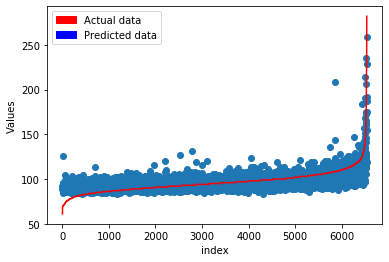

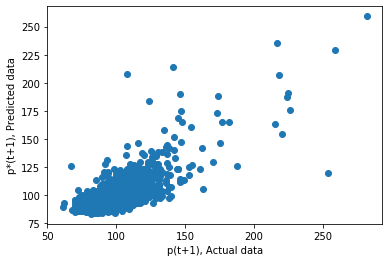

In [26]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L100800_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

L1033 # Cardiac risk factor
=======

In [27]:
regr = RandomForestRegressor(
    max_depth=10, random_state=random_seed, verbose=0, n_estimators=1000, max_features=7
)
regr.fit(
    xtrain[
        [
           'L103300_x', 'L103100_x', 'L103000_x', 'L103200_x', 'S000300_x', 'L102900_x', 'SEX_x', 
                       'L100700_x', 'L190300_x', 'L190400_x', 'L190500_x', 'L100500_x'
        ]
    ],
    ytrain[["L103300_y"]],
)

ypred = regr.predict(
    xtest[
        [
            'L103300_x', 'L103100_x', 'L103000_x', 'L103200_x', 'S000300_x', 'L102900_x', 'SEX_x', 
                       'L100700_x', 'L190300_x', 'L190400_x', 'L190500_x', 'L100500_x'
        ]
    ]
)

print("r2_score", m.r2_score(ytest[["L103300_y"]], ypred))

r2_score 0.699956290822533


In [28]:
pred_L103300 = ypred
with open('models/hyperlipidemiaModel_nextyear_L103300_RF_regressor', 'wb') as f:
    pickle.dump(regr, f)  

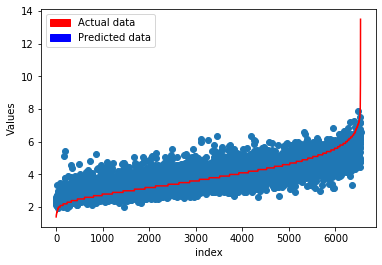

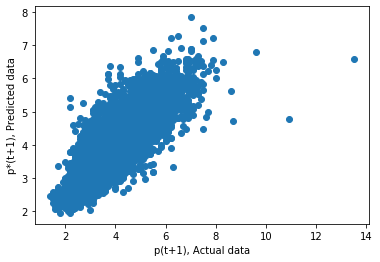

In [29]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L103300_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

103100 # HDL
===

In [30]:
regr = RandomForestRegressor(
    max_depth=10, random_state=random_seed, verbose=0, n_estimators=1000, max_features=7
)
regr.fit(
    xtrain[
        [
           'L103100_x', 'L103300_x', 'SEX_x', 'S000300_x', 'L103000_x', 'L190300_x', 
        'L100700_x', 'L190400_x', 'L190500_x', 'L100500_x', 'S000100_x', 'L101300_x'
        ]
    ],
    ytrain[["L103100_y"]],
)

ypred = regr.predict(
    xtest[
        [
           'L103100_x', 'L103300_x', 'SEX_x', 'S000300_x', 'L103000_x', 'L190300_x', 
        'L100700_x', 'L190400_x', 'L190500_x', 'L100500_x', 'S000100_x', 'L101300_x'
        ]
    ]
)

print("r2_score", m.r2_score(ytest[["L103100_y"]], ypred))

r2_score 0.6198865582539793


In [31]:
pred_L103100 = ypred
with open('models/hyperlipidemiaModel_nextyear_L103100_RF_regressor', 'wb') as f:
    pickle.dump(regr, f)  

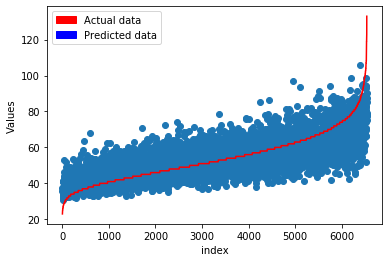

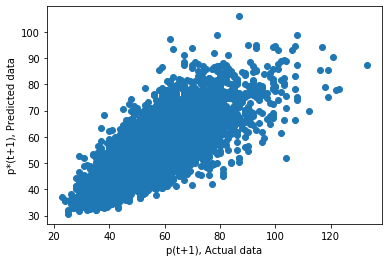

In [32]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L103100_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

L101300 # sgpt
====

In [33]:
regr = RandomForestRegressor(
    max_depth=10, random_state=random_seed, verbose=0, n_estimators=1000, max_features=7
)
regr.fit(
    xtrain[
        [
           'L101300_x', 'SEX_x', 'S000300_x', 'L101200_x', 'L103300_x', 'L101700_x',
       'L100700_x', 'L103100_x', 'L190400_x', 'L190300_x', 'S000100_x', 'L190500_x'
        ]
    ],
    ytrain[["L101300_y"]],
)

ypred = regr.predict(
    xtest[
        [
           'L101300_x', 'SEX_x', 'S000300_x', 'L101200_x', 'L103300_x', 'L101700_x',
       'L100700_x', 'L103100_x', 'L190400_x', 'L190300_x', 'S000100_x', 'L190500_x'
        ]
    ]
)

print("r2_score", m.r2_score(ytest[["L101300_y"]], ypred))

r2_score 0.4091557691486357


In [34]:
pred_L101300 = ypred
with open('models/hyperlipidemiaModel_nextyear_L101300_RF_regressor', 'wb') as f:
    pickle.dump(regr, f)  

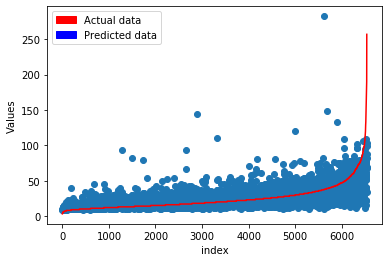

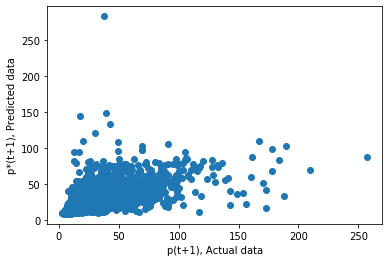

In [35]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L101300_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

L190300 # RBC
====

In [36]:
regr = RandomForestRegressor(
    max_depth=10, random_state=random_seed, verbose=0, n_estimators=1000, max_features=7
)
regr.fit(
    xtrain[
        [
           'L190300_x', 'SEX_x', 'L190500_x', 'L190400_x', 'L103100_x', 'S000300_x',
       'L100700_x', 'L103300_x', 'S000100_x', 'L103000_x', 'S000501_x', 'S000502_x'
        ]
    ],
    ytrain[["L190300_y"]],
)

ypred = regr.predict(
    xtest[
        [
           'L190300_x', 'SEX_x', 'L190500_x', 'L190400_x', 'L103100_x', 'S000300_x',
       'L100700_x', 'L103300_x', 'S000100_x', 'L103000_x', 'S000501_x', 'S000502_x'
        ]
    ]
)

print("r2_score", m.r2_score(ytest[["L190300_y"]], ypred))


r2_score 0.7510636076682116


In [37]:
pred_L190300 = ypred
with open('models/hyperlipidemiaModel_nextyear_L190300_RF_regressor', 'wb') as f:
    pickle.dump(regr, f)  

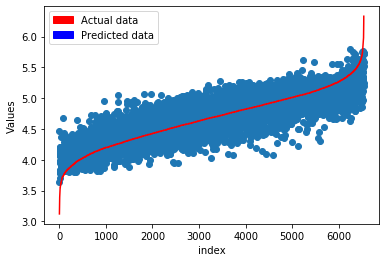

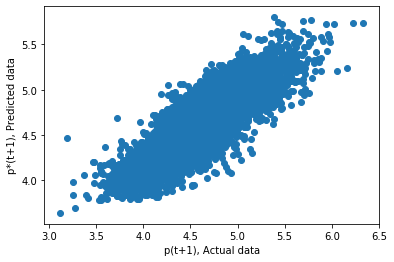

In [38]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L190300_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

L190500 # HCT
=======

In [39]:
regr = RandomForestRegressor(
    max_depth=10, random_state=random_seed, verbose=0, n_estimators=1000, max_features=7
)
regr.fit(
    xtrain[
        [
           'L190500_x', 'SEX_x',  'L190400_x', 'L190300_x', 'L104500_x', 'L190800_x',
       'S000300_x', 'L100700_x', 'L103100_x', 'S000100_x', 'S000502_x', 'S000501_x'
        ]
    ],
    ytrain[["L190500_y"]],
)

ypred = regr.predict(
    xtest[
        [
           'L190500_x', 'SEX_x',  'L190400_x', 'L190300_x', 'L104500_x', 'L190800_x',
       'S000300_x', 'L100700_x', 'L103100_x', 'S000100_x', 'S000502_x', 'S000501_x'
        ]
    ]
)

print("r2_score", m.r2_score(ytest[["L190500_y"]], ypred))


r2_score 0.736084086066724


In [40]:
pred_L190500 = ypred
with open('models/hyperlipidemiaModel_nextyear_L190500_RF_regressor', 'wb') as f:
    pickle.dump(regr, f)  

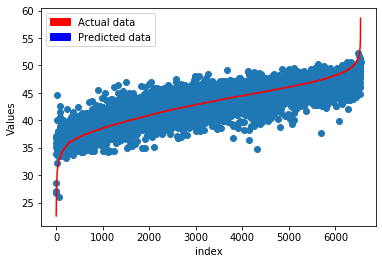

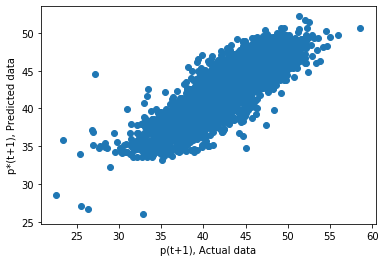

In [41]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L190500_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

Categorical values
=====

In [42]:
pred_FIELD_33 = ytest.FIELD_33_y

In [43]:
pred_FIELD_38 = ytest.FIELD_38_y

In [44]:
pred_FIELD_40 = ytest.FIELD_40_y

In [45]:
pred_SEX = ytest.SEX_y

In [46]:
pred_AGE = ytest.AGE_y + 1

Combine the predicted values to make dataframe
====

In [47]:
NextYearData = pd.DataFrame()
NextYearData["P_FIELD_1"] = ytest.FIELD_1_y.values
NextYearData["P_FIELD_2"] = ytest.FIELD_2_y.values

NextYearData["P_L190500"] = pred_L190500
NextYearData["P_L190300"] = pred_L190300
NextYearData["P_L101300"] = pred_L101300

NextYearData["P_L100700"] = pred_L100700
NextYearData["P_S000300"] = pred_S000300
NextYearData["P_L101700"] = pred_L101700
NextYearData["P_L100800"] = pred_L100800
NextYearData["P_L103300"] = pred_L103300
NextYearData["P_L103100"] = pred_L103100
# NextYearData["P_L102900"] = pred_L102900
# NextYearData["P_L103200"] = pred_L103200

NextYearData["P_FIELD_33"] = pred_FIELD_33.values
NextYearData["P_FIELD_38"] = pred_FIELD_38.values
NextYearData["P_FIELD_40"] = pred_FIELD_40.values

NextYearData["P_SEX"] = pred_SEX.values
NextYearData["P_AGE"] = pred_AGE.values

NextYearData["A_L102900"] = ytest.L102900_y.values
NextYearData["A_L103200"] = ytest.L103200_y.values
NextYearData["A_L103000"] = ytest.L103000_y.values
NextYearData["A_L103300"] = ytest.L103300_y.values

_class = []
for i in range(NextYearData.shape[0]):
    if((NextYearData.A_L102900[i] <= 200) & (NextYearData.A_L103200[i] <= 130) & (NextYearData.A_L103000[i] <=150)):
        _class.append(0)
    else:
        _class.append(1)
NextYearData["CLASS"] = _class

NextYearData.head()

,P_FIELD_1,P_FIELD_2,P_L190500,P_L190300,P_L101300,P_L100700,P_S000300,P_L101700,P_L100800,P_L103300,...,P_FIELD_33,P_FIELD_38,P_FIELD_40,P_SEX,P_AGE,A_L102900,A_L103200,A_L103000,A_L103300,CLASS
0,832931,20170615,42.303343,4.233373,20.368448,5.758576,21.390565,66.156611,93.247472,4.336932,...,2.0,1.0,0.0,0.0,46.0,202.0,138.0,97.0,4.5,1
1,568324,20171026,42.768966,4.715346,23.783446,3.773582,24.139528,21.533274,94.743580,3.991865,...,2.0,1.0,4.0,0.0,38.0,218.0,147.0,92.0,4.1,1
2,939208,20151120,38.541775,4.078241,9.521773,4.968902,18.966969,20.014022,90.290919,3.345495,...,1.0,0.0,7.0,1.0,47.0,319.0,214.0,141.0,4.1,1
3,955086,20161004,44.477594,4.827366,19.435973,6.310008,23.998752,19.553086,94.936117,4.284281,...,1.0,1.0,1.0,0.0,49.0,186.0,126.0,111.0,4.9,0
4,796058,20170531,39.400646,4.258871,16.770675,3.584354,20.031351,15.919886,87.363806,2.443910,...,1.0,1.0,5.0,1.0,45.0,179.0,89.0,48.0,2.2,0


In [48]:
NextYearData.to_csv("Predicted_NextYearData.txt", sep=",")

==============================================
==========

In [49]:
# select the actual next year values

NextYearData_actualData = pd.DataFrame()
NextYearData_actualData["FIELD_1"] = ytest.FIELD_1_y.values
NextYearData_actualData["FIELD_2"] = ytest.FIELD_2_y.values

NextYearData_actualData["L190500"] = ytest.L190500_y.values
NextYearData_actualData["L190300"] = ytest.L190300_y.values
NextYearData_actualData["L101300"] = ytest.L101300_y.values


NextYearData_actualData["L100700"] = ytest.L100700_y.values
NextYearData_actualData["S000300"] = ytest.S000300_y.values
NextYearData_actualData["L101700"] = ytest.L101700_y.values
NextYearData_actualData["L100800"] = ytest.L100800_y.values
NextYearData_actualData["L103300"] = ytest.L103300_y.values 

NextYearData_actualData["L103100"] = ytest.L103100_y.values 
# NextYearData_actualData["L102900"] = ytest.L102900_y.values
# NextYearData_actualData["L103200"] = ytest.L103200_y.values 

NextYearData_actualData["FIELD_33"] = ytest.FIELD_33_y.values
NextYearData_actualData["FIELD_38"] = ytest.FIELD_38_y.values
NextYearData_actualData["FIELD_40"] = ytest.FIELD_40_y.values
NextYearData_actualData["SEX"] = ytest.SEX_y.values
NextYearData_actualData["AGE"] = ytest.AGE_y.values

NextYearData_actualData["L102900"] = ytest.L102900_y.values
NextYearData_actualData["L103200"] = ytest.L103200_y.values
NextYearData_actualData["L103000"] = ytest.L103000_y.values
NextYearData_actualData["L103300"] = ytest.L103300_y.values

_class = []
for i in range(NextYearData_actualData.shape[0]):
    if((NextYearData_actualData.L102900[i] <= 200) & 
       (NextYearData_actualData.L103200[i] <= 130) & 
       (NextYearData_actualData.L103000[i] <=150)):
        _class.append(0)
    else:
        _class.append(1)
NextYearData_actualData["CLASS"] = _class
 

NextYearData_actualData.to_csv("NextYearData_actualData_test.txt", sep=",")

==========================================================
===

In [53]:
# select the actual this year values

ThisYearData_actualData = pd.DataFrame()
ThisYearData_actualData["FIELD_1"] = xtest.FIELD_1_x.values
ThisYearData_actualData["FIELD_2"] = xtest.FIELD_2_x.values

ThisYearData_actualData["L190500"] = xtest.L190500_x.values
ThisYearData_actualData["L190300"] = xtest.L190300_x.values
ThisYearData_actualData["L101300"] = xtest.L101300_x.values

ThisYearData_actualData["L100700"] = xtest.L100700_x.values
ThisYearData_actualData["S000300"] = xtest.S000300_x.values
ThisYearData_actualData["L101700"] = xtest.L101700_x.values
ThisYearData_actualData["L100800"] = xtest.L100800_x.values
ThisYearData_actualData["L103300"] = xtest.L103300_x.values

ThisYearData_actualData["L103100"] = xtest.L103100_x.values
# ThisYearData_actualData["L102900"] = xtest.L102900_x.values
# ThisYearData_actualData["L103200"] = xtest.L103200_x.values

ThisYearData_actualData["FIELD_33"] = xtest.FIELD_33_x.values
ThisYearData_actualData["FIELD_38"] = xtest.FIELD_38_x.values
ThisYearData_actualData["FIELD_40"] = xtest.FIELD_40_x.values
ThisYearData_actualData["SEX"] = xtest.SEX_x.values
ThisYearData_actualData["AGE"] = xtest.AGE_x.values 


ThisYearData_actualData["L102900"] = xtest.L102900_x.values
ThisYearData_actualData["L103200"] = xtest.L103200_x.values
ThisYearData_actualData["L103000"] = xtest.L103000_x.values
ThisYearData_actualData["L103300"] = xtest.L103300_x.values

_class = []
for i in range(ThisYearData_actualData.shape[0]):
    if((ThisYearData_actualData.L102900[i] <= 200) & 
       (ThisYearData_actualData.L103200[i] <= 130) & 
       (ThisYearData_actualData.L103000[i] <=150)):
        _class.append(0)
    else:
        _class.append(1)
ThisYearData_actualData["CLASS"] = _class

ThisYearData_actualData.to_csv("ThisYearData_actualData_test.txt", sep=",")

============================================
=========

In [54]:
# select the actual next year values train

NextYearData_actualData_train = pd.DataFrame()
NextYearData_actualData_train["FIELD_1"] = ytrain.FIELD_1_y.values
NextYearData_actualData_train["FIELD_2"] = ytrain.FIELD_2_y.values

NextYearData_actualData_train["L190500"] = ytrain.L190500_y.values
NextYearData_actualData_train["L190300"] = ytrain.L190300_y.values
NextYearData_actualData_train["L101300"] = ytrain.L101300_y.values

NextYearData_actualData_train["L100700"] = ytrain.L100700_y.values
NextYearData_actualData_train["S000300"] = ytrain.S000300_y.values
NextYearData_actualData_train["L101700"] = ytrain.L101700_y.values
NextYearData_actualData_train["L100800"] = ytrain.L100800_y.values
NextYearData_actualData_train["L103300"] = ytrain.L103300_y.values 

NextYearData_actualData_train["L103100"] = ytrain.L103100_y.values 
# NextYearData_actualData_train["L102900"] = ytrain.L102900_y.values
# NextYearData_actualData_train["L103200"] = ytrain.L103200_y.values 


NextYearData_actualData_train["FIELD_33"] = ytrain.FIELD_33_y.values
NextYearData_actualData_train["FIELD_38"] = ytrain.FIELD_38_y.values
NextYearData_actualData_train["FIELD_40"] = ytrain.FIELD_40_y.values
NextYearData_actualData_train["SEX"] = ytrain.SEX_y.values
NextYearData_actualData_train["AGE"] = ytrain.AGE_y.values


NextYearData_actualData_train["L102900"] = ytrain.L102900_y.values
NextYearData_actualData_train["L103200"] = ytrain.L103200_y.values
NextYearData_actualData_train["L103000"] = ytrain.L103000_y.values
NextYearData_actualData_train["L103300"] = ytrain.L103300_y.values

_class = []
for i in range(NextYearData_actualData_train.shape[0]):
    if((NextYearData_actualData_train.L102900[i] <= 200) & 
       (NextYearData_actualData_train.L103200[i] <= 130) & 
       (NextYearData_actualData_train.L103000[i] <=150)):
        _class.append(0)
    else:
        _class.append(1)
NextYearData_actualData_train["CLASS"] = _class 

NextYearData_actualData_train.to_csv("NextYearData_actualData_train.txt", sep=",")

=================================================
==============

In [55]:
# select the actual this year values train

ThisYearData_actualData_train = pd.DataFrame()
ThisYearData_actualData_train["FIELD_1"] = xtrain.FIELD_1_x.values
ThisYearData_actualData_train["FIELD_2"] = xtrain.FIELD_2_x.values

ThisYearData_actualData_train["L190500"] = xtrain.L190500_x.values
ThisYearData_actualData_train["L190300"] = xtrain.L190300_x.values
ThisYearData_actualData_train["L101300"] = xtrain.L101300_x.values

ThisYearData_actualData_train["L100700"] = xtrain.L100700_x.values
ThisYearData_actualData_train["S000300"] = xtrain.S000300_x.values
ThisYearData_actualData_train["L101700"] = xtrain.L101700_x.values
ThisYearData_actualData_train["L100800"] = xtrain.L100800_x.values
ThisYearData_actualData_train["L103300"] = xtrain.L103300_x.values

ThisYearData_actualData_train["L103100"] = xtrain.L103100_x.values
# ThisYearData_actualData_train["L102900"] = xtrain.L102900_x.values
# ThisYearData_actualData_train["L103200"] = xtrain.L103200_x.values


ThisYearData_actualData_train["FIELD_33"] = xtrain.FIELD_33_x.values
ThisYearData_actualData_train["FIELD_38"] = xtrain.FIELD_38_x.values
ThisYearData_actualData_train["FIELD_40"] = xtrain.FIELD_40_x.values
ThisYearData_actualData_train["SEX"] = xtrain.SEX_x.values
ThisYearData_actualData_train["AGE"] = xtrain.AGE_x.values


ThisYearData_actualData_train["L102900"] = ytrain.L102900_y.values
ThisYearData_actualData_train["L103200"] = ytrain.L103200_y.values
ThisYearData_actualData_train["L103000"] = ytrain.L103000_y.values
ThisYearData_actualData_train["L103300"] = ytrain.L103300_y.values

_class = []
for i in range(ThisYearData_actualData_train.shape[0]):
    if((ThisYearData_actualData_train.L102900[i] <= 200) & 
       (ThisYearData_actualData_train.L103200[i] <= 130) & 
       (ThisYearData_actualData_train.L103000[i] <=150)):
        _class.append(0)
    else:
        _class.append(1)
ThisYearData_actualData_train["CLASS"] = _class 



ThisYearData_actualData_train.to_csv("ThisYearData_actualData_train.txt", sep=",")